In [1]:
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import geopandas as gpd

club_games_df = pd.read_feather('../cleaned_data/club_games.feather')
events_df = pd.read_feather('../cleaned_data/game_events.feather')
games_df = pd.read_feather('../cleaned_data/games.feather')
appearances_df = pd.read_feather('../cleaned_data/appearances.feather')

# Games Stats

Visualizzazioni riguardanti le statistiche delle partite e degli eventi delle partite

### Statistiche Partite

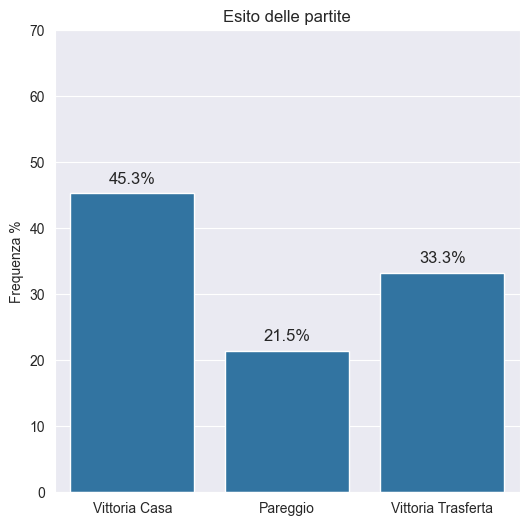

In [13]:
# Esito delle partite: percentuale di vittorie in casa, fuori casa e pareggi

#rimuove duplicati
club_games_df_unique = club_games_df.query('hosting == "Home"')

total_games = len(club_games_df_unique)

home_wins = len(club_games_df_unique.query('is_win == True'))/total_games*100
draws = len(club_games_df_unique.query('club_goals == opponent_goals'))/total_games*100
away_wins = len(club_games_df_unique.query('club_goals < opponent_goals'))/total_games*100

results_percentage_df = pd.DataFrame({
    'result': ['Vittoria Casa', 'Pareggio', 'Vittoria Trasferta'],
    'percentage': [home_wins, draws, away_wins]
})


plt.figure(figsize=(6,6))
ax = sns.barplot(data=results_percentage_df, x='result', y='percentage')

for i, (percentage, result) in enumerate(zip(results_percentage_df['percentage'], results_percentage_df['result'])):
    ax.text(i, percentage + 1, f"{percentage:.1f}%", ha='center', va='bottom', fontsize=12)
    
plt.title('Esito delle partite')
plt.xlabel('')
plt.ylabel('Frequenza %')
plt.ylim(0,70)
plt.show()

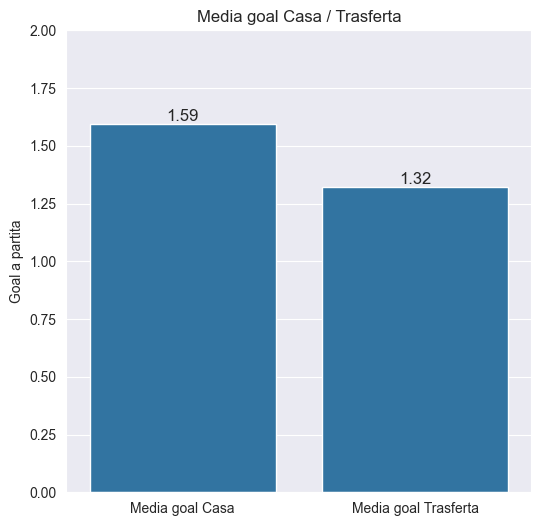

In [32]:
# media di goal casa-trasferta

home_goals = club_games_df_unique['club_goals'].sum()
away_goals = club_games_df_unique['opponent_goals'].sum()

avg_home_goals = home_goals / len(club_games_df_unique)
avg_away_goals = away_goals / len(club_games_df_unique)

avg_goals_df = pd.DataFrame({
    'hosting': ['Media goal Casa', 'Media goal Trasferta'],
    'average': [avg_home_goals, avg_away_goals]
})


plt.figure(figsize=(6,6))
ax = sns.barplot(data=avg_goals_df, x='hosting', y='average')

for index, row in avg_goals_df.iterrows():
    ax.text(index, row['average'], f"{row['average']:.2f}", ha='center', va='bottom', fontsize=12)

plt.title('Media goal Casa / Trasferta')
plt.xlabel('')
plt.ylabel('Goal a partita')
plt.ylim(0,2)
plt.show()

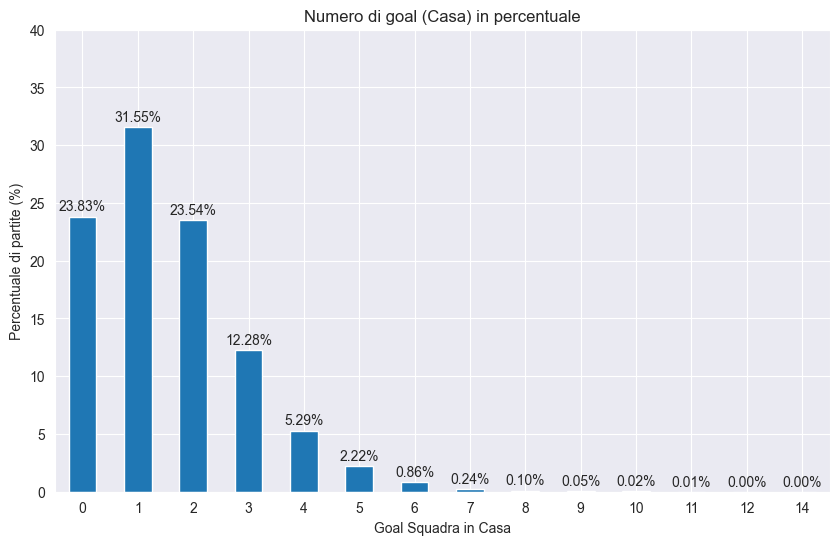

In [16]:
# goal segnati Casa

home_goal_counts = games_df['home_club_goals'].value_counts().sort_index()
total_games = len(games_df)
home_goal_percentages = (home_goal_counts / total_games) * 100


plt.figure(figsize=(10, 6))
ax = home_goal_percentages.plot(kind='bar', title="Numero di goal (Casa) in percentuale")

for i, percentage in enumerate(home_goal_percentages):
    ax.text(i, percentage + 0.5, f'{percentage:.2f}%', ha='center')

plt.xlabel('Goal Squadra in Casa')
plt.ylabel('Percentuale di partite (%)')
plt.xticks(rotation=0)
plt.ylim(0, 40)
plt.show()

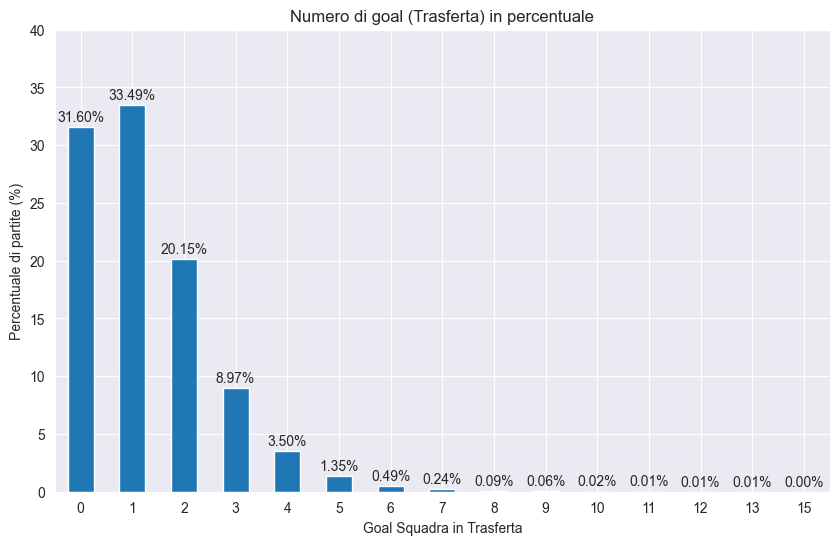

In [17]:
# goal segnati Trasferta

away_goal_counts = games_df['away_club_goals'].value_counts().sort_index()
total_games = len(games_df)
away_goal_percentages = (away_goal_counts / total_games) * 100


plt.figure(figsize=(10, 6))
ax = away_goal_percentages.plot(kind='bar', title="Numero di goal (Trasferta) in percentuale")

for i, percentage in enumerate(away_goal_percentages):
    ax.text(i, percentage + 0.5, f'{percentage:.2f}%', ha='center')

plt.xlabel('Goal Squadra in Trasferta')
plt.ylabel('Percentuale di partite (%)')
plt.xticks(rotation=0)
plt.ylim(0, 40)
plt.show()

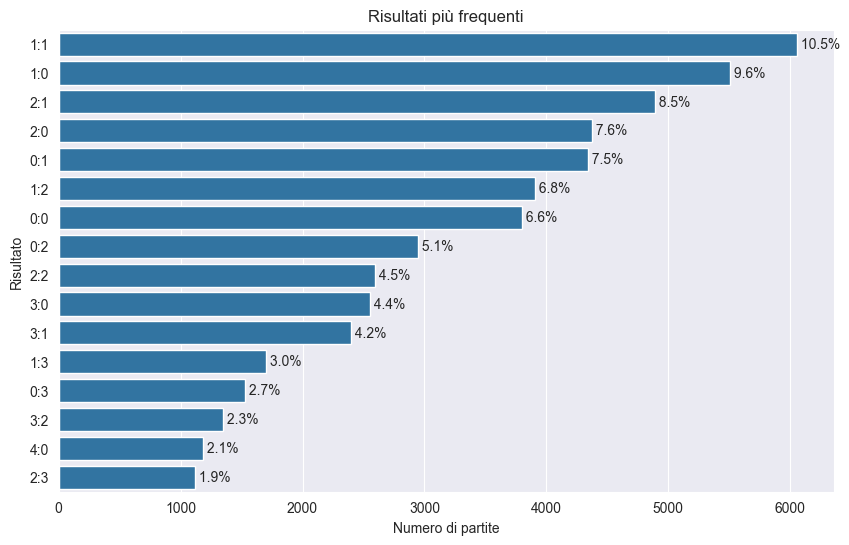

In [18]:
# Risultati più frequenti

game_results = games_df['score'].value_counts().reset_index()
game_results.columns = ['score', 'count']

total_games = len(games_df)
game_results['percentage'] = (game_results['count'] / total_games) * 100

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=game_results.head(16), y='score', x='count', orient='h')

for i, row in game_results.head(16).iterrows():
    ax.text(row['count'], i, f" {row['percentage']:.1f}%", ha='left', va='center', fontsize=10)

plt.title("Risultati più frequenti")
plt.xlabel('Numero di partite')
plt.ylabel('Risultato')
plt.show()

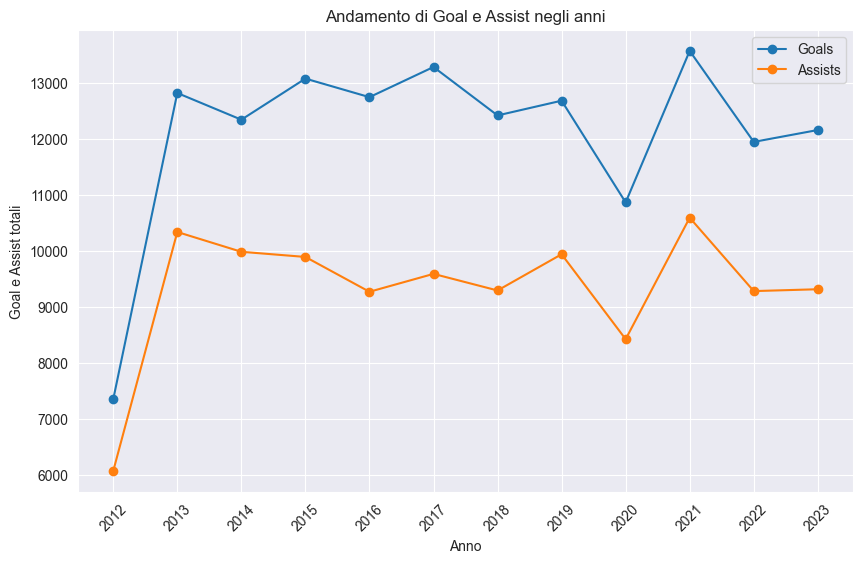

In [7]:
# Andamento di Goal e Assist negli anni

annual_totals = appearances_df.groupby(appearances_df['date'].dt.to_period('Y'))[['goals', 'assists']].sum()

plt.figure(figsize=(10, 6))
plt.plot(annual_totals.index.astype(str), annual_totals['goals'], marker='o', label='Goals')
plt.plot(annual_totals.index.astype(str), annual_totals['assists'], marker='o', label='Assists')

plt.xlabel('Anno')
plt.ylabel('Goal e Assist totali')
plt.title('Andamento di Goal e Assist negli anni')
plt.legend()
plt.xticks(rotation=45)
plt.show()

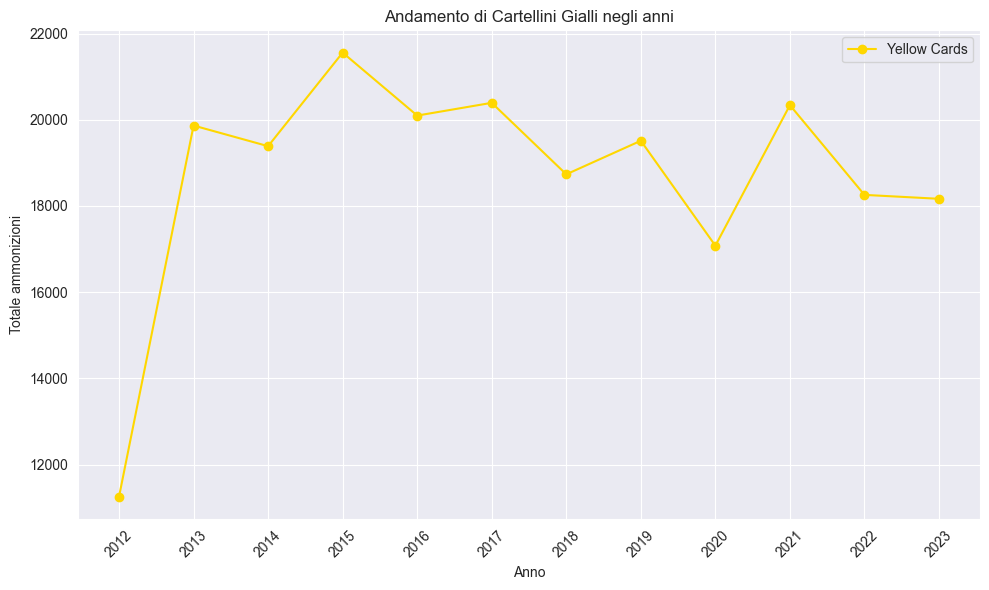

In [8]:
# Andamento dei cartellini gialli negli anni

annual_yellow_cards = appearances_df.groupby(appearances_df['date'].dt.to_period('Y'))['yellow_cards'].sum()

# Plot dei totali annuali di cartellini gialli
plt.figure(figsize=(10, 6))
plt.plot(annual_yellow_cards.index.astype(str), annual_yellow_cards.values, marker='o', label='Yellow Cards', color='gold')

plt.xlabel('Anno')
plt.ylabel('Totale ammonizioni')
plt.title('Andamento di Cartellini Gialli negli anni')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

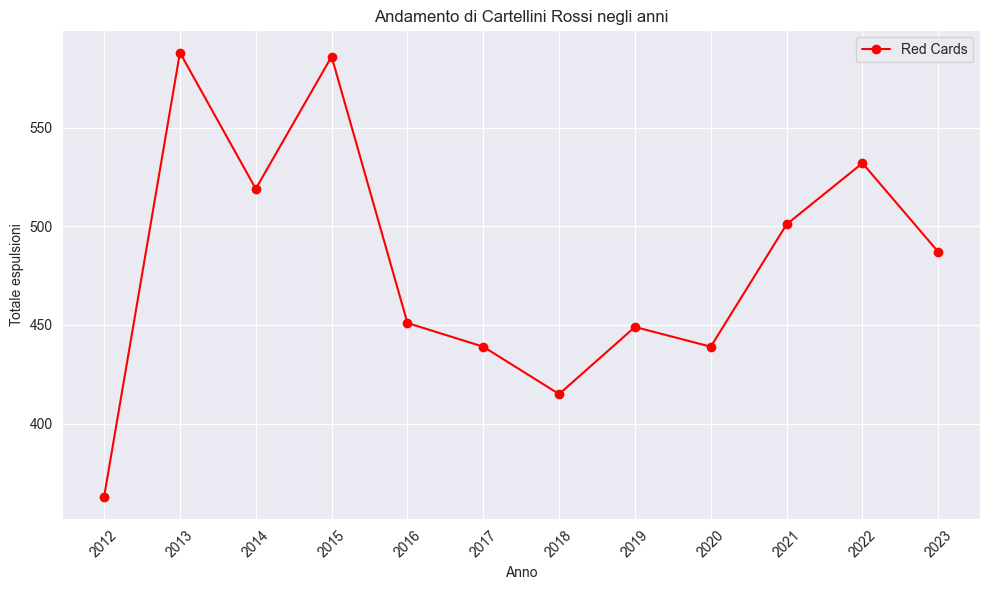

In [9]:
# Andamento dei cartellini rossi negli anni

annual_red_cards = appearances_df.groupby(appearances_df['date'].dt.to_period('Y'))['red_cards'].sum()

# Plot dei totali annuali di cartellini rossi
plt.figure(figsize=(10, 6))
plt.plot(annual_red_cards.index.astype(str), annual_red_cards.values, marker='o', label='Red Cards', color='red')

plt.xlabel('Anno')
plt.ylabel('Totale espulsioni')
plt.title('Andamento di Cartellini Rossi negli anni')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Statistiche Eventi delle partite

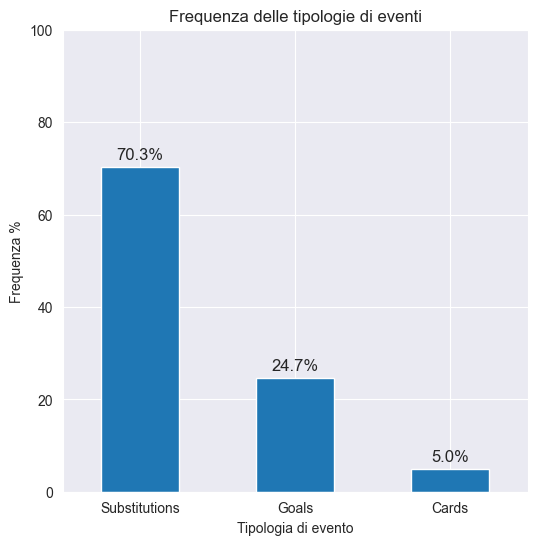

In [22]:
# frequenza delle tipologie di eventi

event_count = events_df['type'].value_counts()
event_percentages = (event_count / len(events_df)) * 100

plt.figure(figsize=(6,6))
ax = event_percentages.plot(kind='bar')

for i, v in enumerate(event_percentages):
    ax.text(i, v + 1, f"{v:.1f}%", ha='center', va='bottom', fontsize=12)

plt.title('Frequenza delle tipologie di eventi')
plt.ylim(0,100)
plt.ylabel('Frequenza %')
plt.xlabel('Tipologia di evento')
plt.xticks(rotation=0)
plt.show()

Totale di goal segnati nel primo tempo: 25295
Totale di goal segnati nel secondo tempo: 29487


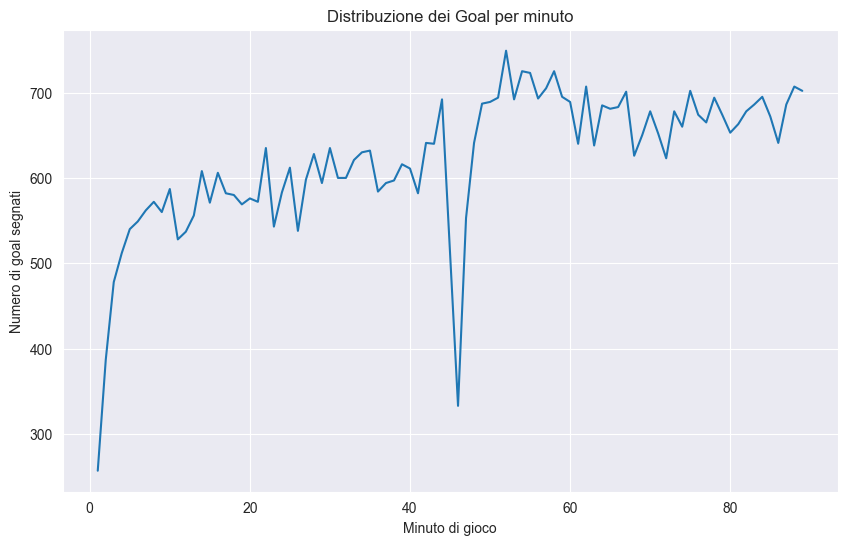

In [23]:
# distribuzione dei gol per minuto di gioco

# togliamo 90 e 45 min perchè comprendono anche i minuti di recupero
goal_events = events_df.query('type == "Goals" and minute<90 and minute!=45')

goal_per_minute = goal_events['minute'].value_counts().sort_index()

first_half_goals = len(goal_events.query('minute <= 45'))
second_half_goals = len(goal_events.query('minute > 45'))

print(f"Totale di goal segnati nel primo tempo: {first_half_goals}")
print(f"Totale di goal segnati nel secondo tempo: {second_half_goals}")

plt.figure(figsize=(10,6))
sns.lineplot(data=goal_per_minute)
plt.title('Distribuzione dei Goal per minuto')
plt.xlabel('Minuto di gioco')
plt.ylabel('Numero di goal segnati')
plt.show()

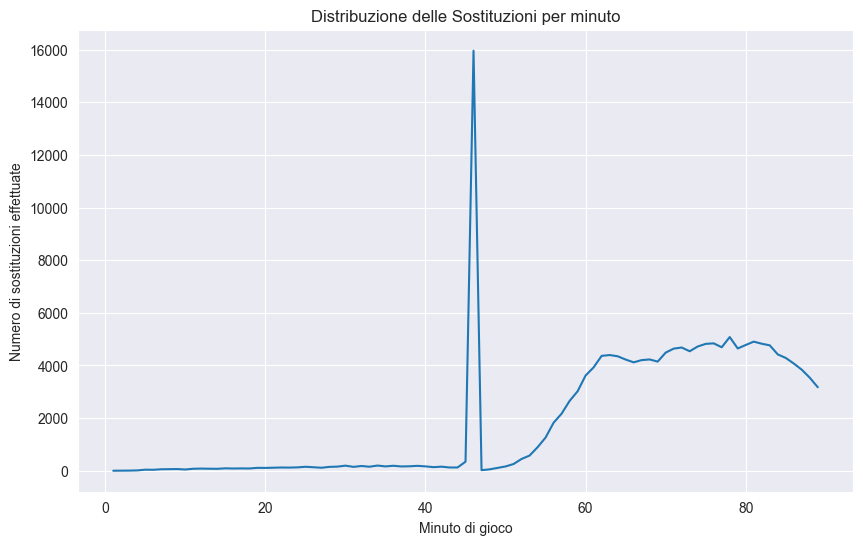

In [24]:
# distribuzione delle sostituzioni per minuto di gioco

# togliamo tempi supplementari (min>=90)
subs_events = events_df.query('type == "Substitutions" and minute<90')

subs_per_minute = subs_events['minute'].value_counts().sort_index()

plt.figure(figsize=(10,6))
sns.lineplot(data=subs_per_minute)
plt.title('Distribuzione delle Sostituzioni per minuto')
plt.xlabel('Minuto di gioco')
plt.ylabel('Numero di sostituzioni effettuate')
plt.show()